73


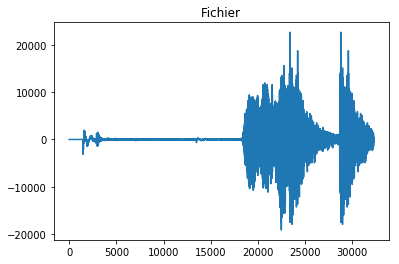

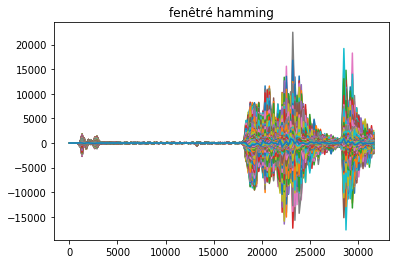

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


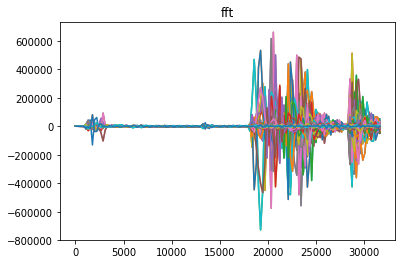

In [94]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

# importation de module pour la manipulation de fichiers audios
from fastdtw import fastdtw, dtw
from pydub import AudioSegment
from scipy.io.wavfile import read as wread
from scipy.spatial.distance import euclidean


def w_k(k, n, N):
    return np.exp(2*1j*k*n*np.pi/N)

def dft(s, N):
    result = [0]*int(N)
    k = 0
    while (k<N):
        n=0
        while (n<N):
            result[k] += s[n]*w_k(k,n,N).conjugate()
            n = n + 1
        k = k + 1
    return result


# Fichier en entrée (ce qui a été dit)

f_echant, data = wread('sound/1.wav')
facteur = 16

# representation amplitude fréquence
abscisse = []
ordonne = []
cpt = 0

def hammi(signal):
    # découpage en fenetres de hamming, 22050 fps, pour 20ms la fenetre ça fait 22050*0.020
    nTailleFen = round(22050*0.02)
    fenPure = np.hamming(nTailleFen)
    nSize = len(signal)
    tSortie = []
#     print(fenPure[:50])
#     print( signal)
#     print(nSize)
#     print(nTailleFen)
    print(nSize//nTailleFen)
#     n = 20
#     tSortie.append( signal[n*nTailleFen:(n+1)*nTailleFen]*fenPure )
#     print( tSortie)
    n=0
    nDecal = (nTailleFen+1)//2
    while (n*nDecal) < (nSize-nTailleFen):
#     for n in range (nSize):
        tSortie.append( signal[n*nDecal:n*nDecal +nTailleFen]*fenPure )
        n +=1
    return tSortie
    
# Protocole à suivre :
#     récupération du signal
#     découpage en trames/fenetres de hamming
#     application de la fft sur chaque trame pour avoir le spectre
#     récupération des paramètres/caractéristiques du spectre par la mfcc
#     on obtient alors le cepstre
#     application du liftrage pour enlever le bruit/récupérer que ce qui nous intéresse
    
#     Comparaison ici des résultats avec dft appliquée sur de petites fenêtres au cas où le signal est distordu ?
    
#     Optimisation par détection des silences pour ne pas en prendre compte ?


# np.fft()
# np.dft()
# np.dft_signal_ss_echant()



# normalement on applique la DFT sur tout le signal donc avec N=len(s)
# cependant avec cette méthode de calcul non optimisée, c'est trop lent
# il faut sous-echantilloner, par exemple d'un facteur 4

# print ("Nombre d'echantillons du signal sous-echantillone d'un facteur ", facteur, " : ", len(data)/facteur)
# taille de la transformée de Fourier
# N = int(len(data) / facteur)  # on prend une valeur paire pour N
# if (N%2!=0):
#     N = N -1
# print ("Taille de la DFT : ",N)
# Nouvelle fréquence d'échantillonage
# NFS = f_echant / facteur
# print ("Nouvelle Frequence d'echantillonage : ", NFS )
# nouvelle resolution fréquentielle
# = une des valeurs de la DFT représente (englobe) combien de Hz
# RF = NFS / N
# print ("Resolution frequentielle: ", RF)

# on calcul la DFT du signal sous-echantillone
# dft_signal_ss_echant=dft(data[::facteur],len(data)//facteur)

# on affiche le spectre d'amplitude, que sur la moitié à cause de la symétrie fréquentielle
# on passe les amplitudes en dB
# cpt = 0
# abscisse = []
# ordonne = []
# while (cpt<N):
#         abscisse.append(RF * cpt)
#         ordonne.append(10 * np.log10(abs(dft_signal_ss_echant[cpt])))
        # cpt += 1

# A revoir
def detection_parole(son):
    facteur = 16
    N = int(len(son) / facteur)  # on prend une valeur paire pour N
    if (N % 2 != 0):
        N = N - 1
    dft_signal_ss_echant = dft(son[::facteur], len(son) // facteur)
    log_result = []
    moyenne_log = 0
    for elem in dft_signal_ss_echant:
        log_result.append(10 * np.log10(abs(elem)))
        moyenne_log += 10 * np.log10(abs(elem))
    max_log = max(log_result)
    moyenne_log = moyenne_log / len(dft_signal_ss_echant)

    print("Max log:")
    print(max_log)

    print(moyenne_log)
    # 10% de variation -> parole
    if ((max_log-moyenne_log) > moyenne_log*0.1):
        print("Bruit détecté \n")
    else:
        print("RAS mon colonel \n")


def comparaison(son):
    f_echant, data = wread('audiorecordtest2TMP.wav')
    # f_echant2, data2 = wread('sound/1.wav')

    # 36 pour les 10 chiffres et les 26 lettres
    distance = [100]*36
    # Comparaison avec les chiffres
    cpt = 0
    print(len(data))
    while (cpt<10):
        nomFichier = 'sound/' + str(cpt) +'.wav'
        print(nomFichier)
        f_echant2, data2 = wread(nomFichier)
        print(len(data2))
        distance[cpt], _ = fastdtw(data, data2, dist=euclidean)
#         distance[cpt], _ = dtw(data, data2, dist=euclidean)
        print(cpt)
        cpt = cpt + 1
    # facteur = 16
    # N = int(len(son) / facteur)  # on prend une valeur paire pour N
    # if (N % 2 != 0):
    #     N = N - 1
    # NFS = f_echant / facteur
    # RF = NFS / N
    # dft_signal_ss_echant = dft(data[::facteur], len(data) // facteur)
    # dft_signal_ss_echant2 = dft(data2[::facteur], len(data2) // facteur)
    # distance, path = fastdtw(data, data2, dist=euclidean)
    print(distance)

    
# comparaison(data)
f_echant, data = wread('audiorecordtest2TMP.wav')
tSignalHamminged = hammi(data)
# print(tSignalHamminged)
tSignalFft = tSignalHamminged[:]
tSignalFft = list(map(np.fft.fft, tSignalFft) )

plt.plot(data)
plt.title("Fichier")
plt.show()

# [x * 221 for x in  list(range(0,len(tSignalHamminged)) ) ]
# plt.plot([item for sublist in tSignalHamminged for item in sublist] )
plt.plot([x * 221 for x in  list(range(0,len(tSignalHamminged)) ) ], tSignalHamminged)
plt.title("fenêtré hamming")
plt.show()
plt.plot([x * 221 for x in  list(range(0,len(tSignalFft)) ) ], tSignalFft)
# plt.plot([item for sublist in tSignalFft for item in sublist] )
plt.title("fft")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1479: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


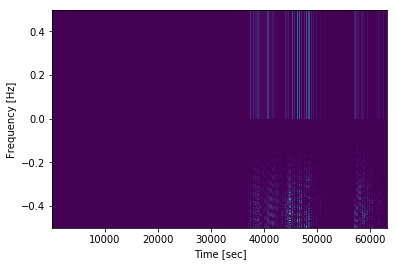

In [98]:
###### test, ça marche pas comme ça, spectrogram de signal veut une fft pas une successions de fenêtres recouvrantes

from scipy import signal

f, t, Sxx = signal.spectrogram(np.array([item for sublist in tSignalFft for item in sublist]))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()